In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from healpyHelper import HealpyHelper

In [2]:
hph = HealpyHelper(NSIDE=64)

In [3]:
wide = Table.read("Master_AGN_Catalog.downselected.wide.v1.1.fits")

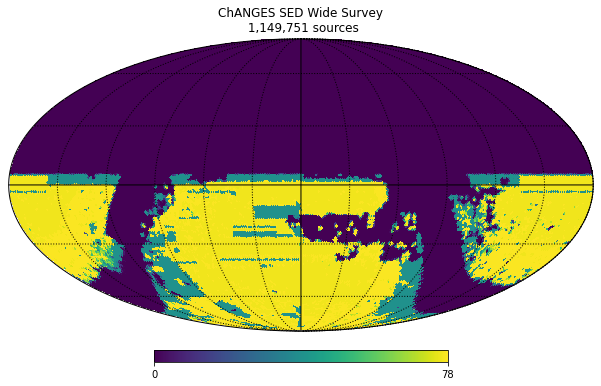

In [4]:
hph.plot_healpix(wide['ra'], wide['dec'], 
             title="ChANGES SED Wide Survey\n {:,} sources".format(len(wide)),
             fname="wide_SED_survey_footprint.png")

In [5]:
med = Table.read("Master_AGN_Catalog.downselected.medium.v1.1.fits")

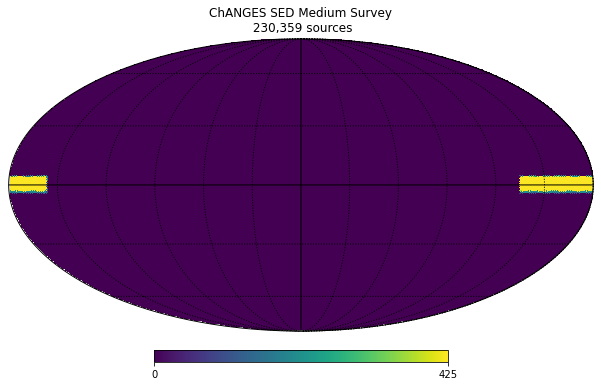

In [6]:
hph.plot_healpix(med['ra'], med['dec'], 
             title="ChANGES SED Medium Survey\n {:,} sources".format(len(med)),
             fname="medium_SED_survey_footprint.png")

In [7]:
no_r_regs = Table.read("Master_AGN_Catalog.downselected.no_r_regions.v1.1.fits")

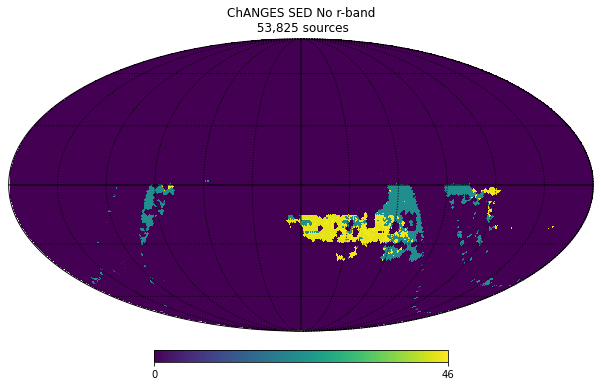

In [8]:
hph.plot_healpix(no_r_regs['ra'], no_r_regs['dec'], 
                 title="ChANGES SED No r-band\n {:,} sources".format(len(no_r_regs)),
                 fname="No_r-band_footprint.png")

In [9]:
#To make the combined footprint, we need to make sure we do not 
#count double the sources in the medium and wide surveys, as some 
#are in both.
all_ids = np.concatenate([wide['id'].data.data,med['id'].data.data,no_r_regs['id'].data.data])
_, kuse = np.unique(all_ids, return_index=True)

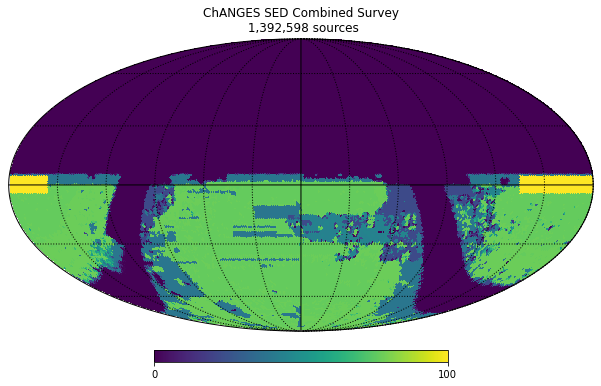

In [10]:
hph.plot_healpix(np.concatenate([wide['ra'],med['ra'],no_r_regs['ra']])[kuse], 
             np.concatenate([wide['dec'], med['dec'],no_r_regs['dec']])[kuse], 
             title="ChANGES SED Combined Survey\n {:,} sources".format(len(all_ids[kuse])),
             cmax=100, fname='combined_SED_survey_footprint.png')

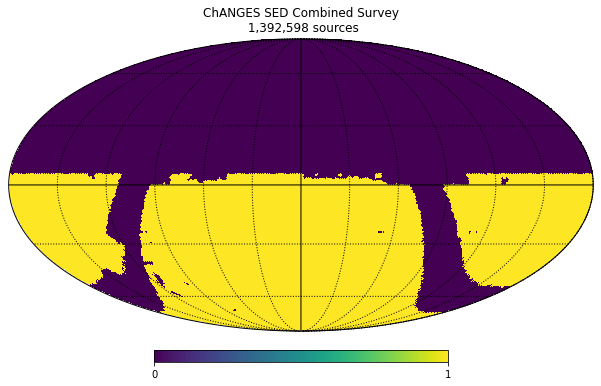

In [11]:
hph.plot_healpix(np.concatenate([wide['ra'],med['ra'],no_r_regs['ra']])[kuse], 
             np.concatenate([wide['dec'], med['dec'],no_r_regs['dec']])[kuse], 
             title="ChANGES SED Combined Survey\n {:,} sources".format(len(all_ids[kuse])),
             cmax=1, fname='combined_SED_survey_binary_footprint.png')